In [1]:
# Import python libraries

import numpy as np
import pandas as pd
import os
import re
import math

In [2]:
# Import dependencies

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

## Data Cleanning

In [3]:
# dateparser = lambda x:pd.datetime.strptime(x, "%Y-%m-%d")

excel_dateparser = lambda x:pd.datetime.strptime(x, "%m/%d/%Y")

In [4]:
#Using date parser to separate main train & test and final train & test dataset

rNews=pd.read_csv('RedditNews.csv', encoding='latin-1')
dNews=pd.read_csv('Combined_News_DJIA.csv', encoding='latin-1', parse_dates = ['Date'],date_parser = excel_dateparser)
# dNews=pd.read_csv('Combined_News_DJIA.csv', encoding='latin-1', parse_dates = ['Date'],date_parser = dateparser)
dNews.head()

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,b'Georgia Invades South Ossetia - if Russia ge...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge"""
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,b'Israel and the US behind the Georgian aggres...,"b'""Do not believe TV, neither Russian nor Geor...",b'Riots are still going on in Montreal (Canada...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo..."
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...",...,b'U.S. troops still in Georgia (did you know t...,b'Why Russias response to Georgia was right',"b'Gorbachev accuses U.S. of making a ""serious ...","b'Russia, Georgia, and NATO: Cold War Two'",b'Remember that adorable 62-year-old who led y...,b'War in Georgia: The Israeli connection',b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man..."
3,2008-08-13,0,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...,b'Britain\'s policy of being tough on drugs is...,b'Body of 14 year old found in trunk; Latest (...,b'China has moved 10 *million* quake survivors...,"b""Bush announces Operation Get All Up In Russi...",b'Russian forces sink Georgian ships ',...,b'Elephants extinct by 2020?',b'US humanitarian missions soon in Georgia - i...,"b""Georgia's DDOS came from US sources""","b'Russian convoy heads into Georgia, violating...",b'Israeli defence minister: US against strike ...,b'Gorbachev: We Had No Choice',b'Witness: Russian forces head towards Tbilisi...,b' Quarter of Russians blame U.S. for conflict...,b'Georgian president says US military will ta...,b'2006: Nobel laureate Aleksander Solzhenitsyn...
4,2008-08-14,1,b'All the experts admit that we should legalis...,b'War in South Osetia - 89 pictures made by a ...,b'Swedish wrestler Ara Abrahamian throws away ...,b'Russia exaggerated the death toll in South O...,b'Missile That Killed 9 Inside Pakistan May Ha...,"b""Rushdie Condemns Random House's Refusal to P...",b'Poland and US agree 

In [5]:
# Using preprocessor to process the text

def preprocessor(text):
    text = (re.sub('[\W]+',' ', text.lower() + ''))
    text = re.sub("b ",' ',text)
    return text

In [6]:
# Apply the preprocessor to all news articles

dNews['Top1'] = dNews['Top1'].apply(preprocessor)
dNews['Top2'] = dNews['Top2'].apply(preprocessor)
dNews['Top3'] = dNews['Top3'].apply(preprocessor)
dNews['Top4'] = dNews['Top4'].apply(preprocessor)
dNews['Top5'] = dNews['Top5'].apply(preprocessor)
dNews['Top6'] = dNews['Top6'].apply(preprocessor)
dNews['Top7'] = dNews['Top7'].apply(preprocessor)
dNews['Top8'] = dNews['Top8'].apply(preprocessor)
dNews['Top9'] = dNews['Top9'].apply(preprocessor)
dNews['Top10'] = dNews['Top10'].apply(preprocessor)
dNews['Top11'] = dNews['Top11'].apply(preprocessor)
dNews['Top12'] = dNews['Top12'].apply(preprocessor)

dNews['Top13'] = dNews['Top13'].apply(preprocessor)
dNews['Top14'] = dNews['Top14'].apply(preprocessor)
dNews['Top15'] = dNews['Top15'].apply(preprocessor)
dNews['Top16'] = dNews['Top16'].apply(preprocessor)
dNews['Top17'] = dNews['Top17'].apply(preprocessor)
dNews['Top18'] = dNews['Top18'].apply(preprocessor)
dNews['Top19'] = dNews['Top19'].apply(preprocessor)
dNews['Top20'] = dNews['Top20'].apply(preprocessor)
dNews['Top21'] = dNews['Top21'].apply(preprocessor)
dNews['Top22'] = dNews['Top22'].apply(preprocessor)
# ----------------------------------------------------------
#x=dNews['Top23'].dropna()
dNews['Top23'] = dNews['Top23'].fillna(method='ffill')
dNews['Top24'] = dNews['Top24'].fillna(method='ffill')
dNews['Top25'] = dNews['Top25'].fillna(method='ffill')
#len(dNews['Top23'])

dNews['Top23'] = dNews['Top23'].apply(preprocessor)
dNews['Top24'] = dNews['Top24'].apply(preprocessor)
dNews['Top25'] = dNews['Top25'].apply(preprocessor)


In [7]:
# Making the separation for last round of test (the final month)
# Apply this after you have vectorized the entire data set....
#. indexing on the basis index select - which rows will be part of the test
#. or split-train, and radomize
#. or build a function to filter the columns....

end_date = '2016-06-24'
start_date = '2016-06-17'
mask = (dNews['Date'] > start_date) & (dNews['Date'] <= end_date)
final_test_df = dNews.loc[mask]
dNews = dNews.loc[~mask]

In [8]:
# X_train = dNews.loc[:1000,"Top1"].values

X1 = dNews.loc[:,"Top1"].values
y1 = dNews.loc[:,"Label"].values
X2 = dNews.loc[:,"Top2"].values
y2 = dNews.loc[:,"Label"].values
X3 = dNews.loc[:,"Top3"].values
y3 = dNews.loc[:,"Label"].values
X4 = dNews.loc[:,"Top3"].values
y4 = dNews.loc[:,"Label"].values

X5 = dNews.loc[:,"Top5"].values
y5 = dNews.loc[:,"Label"].values
X6 = dNews.loc[:,"Top6"].values
y6 = dNews.loc[:,"Label"].values
X7 = dNews.loc[:,"Top7"].values
y7 = dNews.loc[:,"Label"].values
X8 = dNews.loc[:,"Top8"].values
y8 = dNews.loc[:,"Label"].values

X9 = dNews.loc[:,"Top9"].values
y9 = dNews.loc[:,"Label"].values
X10 = dNews.loc[:,"Top10"].values
y10 = dNews.loc[:,"Label"].values
X11 = dNews.loc[:,"Top11"].values
y11 = dNews.loc[:,"Label"].values
X12 = dNews.loc[:,"Top12"].values
y12 = dNews.loc[:,"Label"].values

#------------------------------------------

X13 = dNews.loc[:,"Top13"].values
y13 = dNews.loc[:,"Label"].values
X14 = dNews.loc[:,"Top14"].values
y14= dNews.loc[:,"Label"].values
X15= dNews.loc[:,"Top15"].values
y15= dNews.loc[:,"Label"].values
X16= dNews.loc[:,"Top16"].values
y16= dNews.loc[:,"Label"].values

X17 = dNews.loc[:,"Top17"].values
y17 = dNews.loc[:,"Label"].values
X18 = dNews.loc[:,"Top18"].values
y18= dNews.loc[:,"Label"].values
X19= dNews.loc[:,"Top19"].values
y19= dNews.loc[:,"Label"].values
X20= dNews.loc[:,"Top20"].values
y20= dNews.loc[:,"Label"].values

X21 = dNews.loc[:,"Top21"].values
y21 = dNews.loc[:,"Label"].values
X22 = dNews.loc[:,"Top22"].values
y22= dNews.loc[:,"Label"].values
X23= dNews.loc[:,"Top23"].values
y23= dNews.loc[:,"Label"].values
X24= dNews.loc[:,"Top24"].values
y24= dNews.loc[:,"Label"].values
X25= dNews.loc[:,"Top25"].values
y25= dNews.loc[:,"Label"].values



X = np.concatenate((X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11,
                    X12, X13, X14, X15, X16, X17, X18, X19, X20, X21, X22, X23, X24, X25))
y = np.concatenate((y1, y2, y3, y4, y5, y6, y7, y8, y9, y10, y11,
                    y12, y13, y14, y15, y16, y17, y18, y19, y20, y21, y22, y23, y24, y25))

# 0.56 to 0.58, when we went from first 3 to Top 12
# print(X.shape)
# print(y.shape)

## Apply Naive Bayes Regression Model

In [9]:
# Train and test the models using sklearn

from sklearn.model_selection import train_test_split
vectorizer = CountVectorizer(ngram_range=(2,2), stop_words = 'english')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
X_train=vectorizer.fit_transform(X_train)
X_test=vectorizer.transform(X_test)

In [10]:
# Using the Bernoulli model from naive_bayes (Hyper Parameter = Alpha) smoothing parameter affects the overfitting
# Random Forest

from sklearn.naive_bayes import BernoulliNB
# from sklearn.ensemble import RandomForestClassifier

clf = BernoulliNB(alpha=0.3)
# clf = RandomForestClassifier(n_estimators=10)
modelX = clf.fit(X_train, y_train)
#naive_bayes.fit(X_train, y_train)
modelX.score(X_test, y_test)


0.5541099344427635

In [11]:
X_train.shape

(39660, 307329)

In [12]:
# Using the trainned model for final test dataset (from 2016-5-24 to 2016-6-24)

# X_train = dNews.loc[:1000,"Top1"].values

A1 = final_test_df.loc[:,"Top1"].values
B1 = final_test_df.loc[:,"Label"].values
A2 = final_test_df.loc[:,"Top2"].values
B2 = final_test_df.loc[:,"Label"].values
A3 = final_test_df.loc[:,"Top3"].values
B3 = final_test_df.loc[:,"Label"].values
A4 = final_test_df.loc[:,"Top3"].values
B4 = final_test_df.loc[:,"Label"].values

A5 = final_test_df.loc[:,"Top5"].values
B5 = final_test_df.loc[:,"Label"].values
A6 = final_test_df.loc[:,"Top6"].values
B6 = final_test_df.loc[:,"Label"].values
A7 = final_test_df.loc[:,"Top7"].values
B7 = final_test_df.loc[:,"Label"].values
A8 = final_test_df.loc[:,"Top8"].values
B8 = final_test_df.loc[:,"Label"].values

A9 = final_test_df.loc[:,"Top9"].values
B9 = final_test_df.loc[:,"Label"].values
A10 = final_test_df.loc[:,"Top10"].values
B10 = final_test_df.loc[:,"Label"].values
A11 = final_test_df.loc[:,"Top11"].values
B11 = final_test_df.loc[:,"Label"].values
A12 = final_test_df.loc[:,"Top12"].values
B12 = final_test_df.loc[:,"Label"].values

#------------------------------------------

A13 = final_test_df.loc[:,"Top13"].values
B13 = final_test_df.loc[:,"Label"].values
A14 = final_test_df.loc[:,"Top14"].values
B14= final_test_df.loc[:,"Label"].values
A15= final_test_df.loc[:,"Top15"].values
B15= final_test_df.loc[:,"Label"].values
A16= final_test_df.loc[:,"Top16"].values
B16= final_test_df.loc[:,"Label"].values

A17 = final_test_df.loc[:,"Top17"].values
B17 = final_test_df.loc[:,"Label"].values
A18 = final_test_df.loc[:,"Top18"].values
B18= final_test_df.loc[:,"Label"].values
A19= final_test_df.loc[:,"Top19"].values
B19= final_test_df.loc[:,"Label"].values
A20= final_test_df.loc[:,"Top20"].values
B20= final_test_df.loc[:,"Label"].values

A21 = final_test_df.loc[:,"Top21"].values
B21 = final_test_df.loc[:,"Label"].values
A22 = final_test_df.loc[:,"Top22"].values
B22= final_test_df.loc[:,"Label"].values
A23= final_test_df.loc[:,"Top23"].values
B23= final_test_df.loc[:,"Label"].values
A24= final_test_df.loc[:,"Top24"].values
B24= final_test_df.loc[:,"Label"].values
A25= final_test_df.loc[:,"Top25"].values
B25= final_test_df.loc[:,"Label"].values



final_X_test = np.concatenate((A1, A2, A3, A4, A5, A6, A7, A8, A9, A10, A11,
                    A12, A13, A14, A15, A16, A17, A18, A19, A20, A21, A22, A23, A24, A25))
final_y_test = np.concatenate((B1, B2, B3, B4, B5, B6, B7, B8, B9, B10, B11,
                    B12, B13, B14, B15, B16, B17, B18, B19, B20, B21, B22, B23, B24, B25))


# 0.56 to 0.58, when we went from first 3 to Top 12
# print(X.shape)
# print(y.shape)

#final_X_test = final_test_df.loc[:,"Top1"].values
#final_X_train = dNews.loc[:,"Top1"].values
#final_y_test = final_test_df.loc[:,"Label"].values
#final_y_train = dNews.loc[:,"Label"].values

In [13]:
# Score new data with trained model 

final_X_test_transform=vectorizer.transform(final_X_test)
modelX.score(final_X_test_transform, final_y_test)

0.512

In [14]:
#final_X_train.shape
final_X_test_transform.shape

(125, 307329)

In [15]:
meta_predicted_value = modelX.predict(final_X_test_transform)


def listsum(list):
    ret=0
    for i in list:
        ret += i
    return ret

#split the arr into N chunks
def chunks(arr, m):
    n = int(math.ceil(len(arr) / float(m)))
    return [arr[i:i + n] for i in range(0, len(arr), n)]

In [16]:
list = chunks(meta_predicted_value, 25)

sum_list = listsum(list)

sum_list
confidence_list = []
predict_list = []

for i in sum_list:
    if i < 16.67:
        predict_list.append(-1)
        confidence_list.append(f'Decrease with {(i/25)*100} % confidence')
    else:
        predict_list.append(1)
        confidence_list.append(f'Increase with {(i/25)*100} % confidence')
predict_list
# confidence_list

[1, -1, -1, -1, 1]

In [17]:
predict_list


[1, -1, -1, -1, 1]

In [18]:
confidence_list


['Increase with 68.0 % confidence',
 'Decrease with 60.0 % confidence',
 'Decrease with 56.00000000000001 % confidence',
 'Decrease with 60.0 % confidence',
 'Increase with 76.0 % confidence']

In [19]:
# Instead of using 0 and 1 for decrease and increase, we decided to substitute 0 with -1

final_test_df['predicted_label'] =predict_list
final_test_df['Confidence']= confidence_list
final_test_df['Label'] = final_test_df['Label'].replace(0,-1)
final_test_df['predicted_label'] = final_test_df['predicted_label'].replace(0,-1)
predicted_y_axis = final_test_df['predicted_label'] 

In [20]:
# Getting cumulative values from the actual scores to mimic similar stock patterns.

sum_list = []
sum = final_test_df['Label'].iloc[0] 

for i in final_test_df['Label']:
    sum = sum + i
    sum_list.append(sum)

final_test_df['cum_actual'] = sum_list

In [21]:
# Getting cumulative values from the predicted scores to mimic similar stock patterns.

sum_predict_list = []
sum_predict = predicted_y_axis.iloc[0]

for i in predicted_y_axis:
    sum_predict = sum_predict + i
    sum_predict_list.append(sum_predict)
    
final_test_df['cum_predict'] = sum_predict_list
final_test_df

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top20,Top21,Top22,Top23,Top24,Top25,predicted_label,Confidence,cum_actual,cum_predict
1979,2016-06-20,1,a staggering 87 percent of venezuelans say the...,two corporate whistleblowers may enter into pl...,poland together with russia iran and several g...,three environmental activists were killed per ...,ontario funeral business dissolves the dead po...,new declassified documents reveal how cia abus...,tens of thousands of people gathered in swelte...,japan s dementia crisis hits record levels as ...,...,paris isn t happy about amazon s one hour deli...,australian man pleads guilty to making sexual ...,trudeau condemns killing of 14 canadian embass...,vladimir putin is considering selling part of ...,an elephant has survived being shot in the hea...,wikileaks founder julian assange marks 5 years...,1,Increase with 68.0 % confidence,2,2
1980,2016-06-21,1,an australian athlete who has competed in six ...,russian state television accidentally broadcas...,in 2015 50 environmentalists were killed in br...,china s plan to cut meat consumption by 50 che...,coral bleaching event now biggest in history a...,super rich quaff champagne in venezuela countr...,hong kong bookseller refuses to be silenced af...,chinese prosecutors have successfully sued a c...,...,gazans squeezed by triple taxes as hamas repla...,us and russian fighters in dramatic showdown o...,rising tide of politically acceptable killings...,mexico teachers protest six people are dead an...,canada is set to launch a paid whistleblower p...,russian football fan leader alexander shprygin...,-1,Decrease with 60.0 % confidence,3,1
1981,2016-06-22,-1,german government agrees to ban fracking indef...,teenage recruits were raped by staff and force...,pakistan is selling nuclear materials to n kor...,amazon jaguar shot dead at olympic torch ceremony,mexican flags raised around donald trump s gol...,eu smashes 2020 emissions target six years ear...,police kill eight striking mexican teachers as...,pro choice activists have delivered abortion p...,...,indian state grants jews minority status india...,canadian rescue plane successfully reaches sou...,the swedish parliament on tuesday voted in fav...,french police teargas migrants trying to board...,qawwali musician amjad sabri was shot dead in ...,n korea launches what appears to be musudan mi...,-1,Decrease with 56.00000000000001 % confidence,2,0
1982,2016-06-23,1,today the united kingdom decides whether to re...,e cigarettes should not be banned in public me...,report china is still harvesting organs from p...,man opens fire at cinema complex in germany se...,erdoan europe you dont want us because were mu...,asian millionaires now control more wealth tha...,a japanese porn industry association has apolo...,university students are being warned when clas...,...,australia s gun laws stopped mass shootings an...,french cement company in syria buys oil from i...,pope to visit armenia after irking turkey with...,merkel says nato must be strengthened,china cracks down on online comments click bai...,the prime minister of india is set to get a br...,-1,Decrease with 60.0 % confidence,3,-1
1983,2016-06-24,-1,david cameron to resign as pm after eu referendum,bbc forecasts uk votes to leave the european u...,nicola sturgeon says a second independence ref...,it s official britain votes to leave the europ...,world s largest tibetan buddhist institute ord...,not a single place in scotland voted to leave ...,rich getting richer at the expense of the poor...,spanish minister calls for gibraltar to be ret...,...,nigel farage 350 million pledge to fund the nh...,thousands of london banking jo cuts to start n...,google says there was a large spike in searche...,eu referendum gibraltar backs remain with 94 i...,after brexit u k residents google what is the eu,a turkish man has been found guilty of insulti...,1,Increase with 76.0 % confidence,2,0


## Visualize Results Using Line Chart

In [22]:
# Preparation step for cumulative line chart 

cum_y_actual = final_test_df['cum_actual'] 
cum_y_predict = final_test_df['cum_predict']
cum_x_axis = final_test_df['Date']

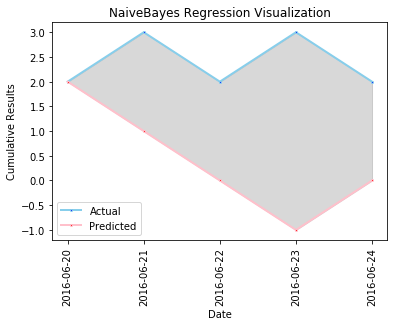

In [26]:
# Making the cumulative line chart for visualization & Showing the discrepancies  

plt.xlabel("Date")
plt.ylabel("Cumulative Results")
plt.title("NaiveBayes Regression Visualization")

plt.plot(cum_x_axis, cum_y_actual, marker='o', markerfacecolor='blue', markersize=2, color='skyblue', linewidth=2, label = 'Actual')
plt.plot(cum_x_axis, cum_y_predict,  marker='o', markerfacecolor='red', markersize=2, color='pink', linewidth=2,label = 'Predicted')
plt.xticks(final_test_df['Date'], rotation = 'vertical')
plt.fill_between(cum_x_axis, cum_y_actual,cum_y_predict, color='grey', alpha='0.3')
plt.legend(loc = 'best')
plt.savefig("resources/naive_regress_week.png")

In [27]:
# Preparation step for individual line chart 

ind_y_actual = final_test_df['Label'] 
ind_y_predict = final_test_df['predicted_label']
ind_x_axis = final_test_df['Date']

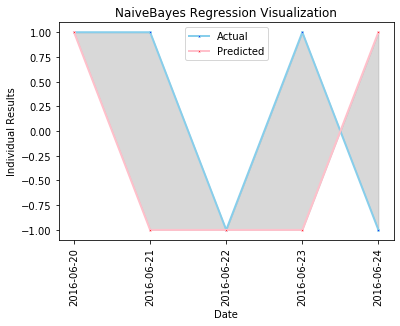

In [28]:
# Making the individual line chart for visualization & Showing the discrepancies  

plt.xlabel("Date")
plt.ylabel("Individual Results")
plt.title("NaiveBayes Regression Visualization")

plt.plot(ind_x_axis, ind_y_actual, marker='o', markerfacecolor='blue', markersize=2, color='skyblue', linewidth=2, label = 'Actual')
plt.plot(ind_x_axis, ind_y_predict,  marker='o', markerfacecolor='red', markersize=2, color='pink', linewidth=2,label = 'Predicted')
plt.xticks(final_test_df['Date'], rotation = 'vertical')
plt.fill_between(ind_x_axis, ind_y_actual, ind_y_predict, color='grey', alpha='0.3')
plt.legend(loc = 'best')


## Visualize Results Using Pie Chart

In [29]:
# Preparation step for the pie chart 

final_test_df['dif'] = final_test_df['Label'] - final_test_df['predicted_label']
final_test_df

right = 0
wrong = 0

for value in final_test_df['dif']:
    if value == 0:
        right += 1
    else:
        wrong += 1


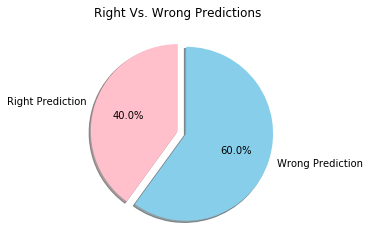

In [40]:
# Making the pie chart for visualization & Showing the right vs. wrong ratio  

plt.title("Right Vs. Wrong Predictions")
labels = ['Right Prediction', 'Wrong Prediction']
sizes = [right,wrong]
colors = ['pink','skyblue']
explode = (0,0.1)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90)
plt.savefig("resources/naive_ratio_week.png")

## Offset By One Day

In [31]:
# Create Individual Offset Values
ind_offset = predict_list[:-1]

start = 1
ind_offset.insert(0,start)

final_test_df['ind_offset'] =ind_offset


In [32]:
# Getting cumulative values from the predicted scores to mimic similar stock patterns.
off_predicted_y_axis = final_test_df['ind_offset'] 

cum_off_list = []
sum_off_predict = off_predicted_y_axis.iloc[0]


for i in off_predicted_y_axis:
    sum_off_predict = sum_off_predict + i
    cum_off_list.append(sum_off_predict)
    
final_test_df['cum_off_predict'] = cum_off_list
final_test_df

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top23,Top24,Top25,predicted_label,Confidence,cum_actual,cum_predict,dif,ind_offset,cum_off_predict
1979,2016-06-20,1,a staggering 87 percent of venezuelans say the...,two corporate whistleblowers may enter into pl...,poland together with russia iran and several g...,three environmental activists were killed per ...,ontario funeral business dissolves the dead po...,new declassified documents reveal how cia abus...,tens of thousands of people gathered in swelte...,japan s dementia crisis hits record levels as ...,...,vladimir putin is considering selling part of ...,an elephant has survived being shot in the hea...,wikileaks founder julian assange marks 5 years...,1,Increase with 68.0 % confidence,2,2,0,1,2
1980,2016-06-21,1,an australian athlete who has competed in six ...,russian state television accidentally broadcas...,in 2015 50 environmentalists were killed in br...,china s plan to cut meat consumption by 50 che...,coral bleaching event now biggest in history a...,super rich quaff champagne in venezuela countr...,hong kong bookseller refuses to be silenced af...,chinese prosecutors have successfully sued a c...,...,mexico teachers protest six people are dead an...,canada is set to launch a paid whistleblower p...,russian football fan leader alexander shprygin...,-1,Decrease with 60.0 % confidence,3,1,2,1,3
1981,2016-06-22,-1,german government agrees to ban fracking indef...,teenage recruits were raped by staff and force...,pakistan is selling nuclear materials to n kor...,amazon jaguar shot dead at olympic torch ceremony,mexican flags raised around donald trump s gol...,eu smashes 2020 emissions target six years ear...,police kill eight striking mexican teachers as...,pro choice activists have delivered abortion p...,...,french police teargas migrants trying to board...,qawwali musician amjad sabri was shot dead in ...,n korea launches what appears to be musudan mi...,-1,Decrease with 56.00000000000001 % confidence,2,0,0,-1,2
1982,2016-06-23,1,today the united kingdom decides whether to re...,e cigarettes should not be banned in public me...,report china is still harvesting organs from p...,man opens fire at cinema complex in germany se...,erdoan europe you dont want us because were mu...,asian millionaires now control more wealth tha...,a japanese porn industry association has apolo...,university students are being warned when clas...,...,merkel says nato must be strengthened,china cracks down on online comments click bai...,the prime minister of india is set to get a br...,-1,Decrease with 60.0 % confidence,3,-1,2,-1,1
1983,2016-06-24,-1,david cameron to resign as pm after eu referendum,bbc forecasts uk votes to leave the european u...,nicola sturgeon says a second independence ref...,it s official britain votes to leave the europ...,world s largest tibetan buddhist institute ord...,not a single place in scotland voted to leave ...,rich getting richer at the expense of the poor...,spanish minister calls for gibraltar to be ret...,...,eu referendum gibraltar backs remain with 94 i...,after brexit u k residents google what is the eu,a turkish man has been found guilty of insulti...,1,Increase with 76.0 % confidence,2,0,-2,-1,0


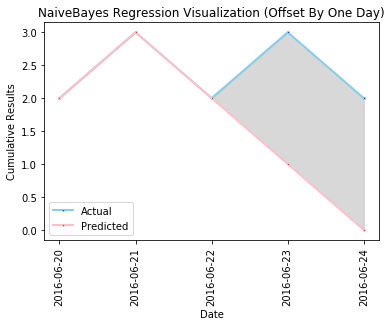

In [35]:
# Making the cumulative line chart for visualization & Showing the discrepancies  

plt.xlabel("Date")
plt.ylabel("Cumulative Results")
plt.title("NaiveBayes Regression Visualization (Offset By One Day)")

plt.plot(cum_x_axis, cum_y_actual, marker='o', markerfacecolor='blue', markersize=2, color='skyblue', linewidth=2, label = 'Actual')
plt.plot(cum_x_axis, cum_off_list,  marker='o', markerfacecolor='red', markersize=2, color='pink', linewidth=2,label = 'Predicted')
plt.xticks(final_test_df['Date'], rotation = 'vertical')
plt.fill_between(cum_x_axis, cum_y_actual,cum_off_list, color='grey', alpha='0.3')
plt.legend()
plt.savefig("resources/naive_offset_regres_week.png")

In [36]:

final_test_df['offset_dif'] = final_test_df['Label'] - final_test_df['ind_offset']

off_right = 0
off_wrong = 0

for value in final_test_df['offset_dif']:
    if value == 0:
        off_right += 1
    else:
        off_wrong += 1


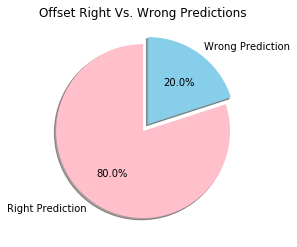

In [39]:
# Making the pie chart for visualization & Showing the right vs. wrong ratio  

plt.title("Offset Right Vs. Wrong Predictions")
labels = ['Right Prediction', 'Wrong Prediction']
sizes = [off_right,off_wrong]
colors = ['pink','skyblue']
explode = (0,0.1)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90)
plt.savefig("resources/naive_offset_ratio_week.png")

In [ ]:
comparison_df = final_test_df[['Label','predicted_label','ind_offset','cum_actual','cum_predict','cum_off_predict','dif','offset_dif']]
comparison_df